# **Predicting anomalies in critical infrastrucutre with photonic fiber-optic quantum sensing and QML**

## Synthetic dataset creation


We create a randomized Hamiltonian that, if applied, models the presence of an anomaly in the infrastructure. This evolutions are taken from ensemble sensing with entanglement as seen in the Heisenberg limit. 

After initializing a N-qubit system to zeros, we apply CNOT gates to every qubit. We model the system Hamiltonian as the following:

$$ \hat{H}=\sum_{l=1}^M \mathbb{1}^{\otimes l-1} \otimes \hat{H}_l \otimes \mathbb{1}^{\otimes M-l} $$

From this, it can be stated that the unitary operators to be applied to every qubit is of the below form, parameterized by a _w_0_ that will correlate to state rotations.

$$ |\psi(t)\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes M}+\mathrm{e}^{\mathrm{i} M \omega_0 t}|1\rangle^{\otimes M}\right) $$

In [8]:
# Imports
import pennylane as qml
import numpy as np
import pandas as pd

In [20]:
def dataset_circuit(num_qubits, w_0):
    dev = qml.device("default.qubit", wires = num_qubits)
    qml.Hadamard(wires = 0)
    for i in range(1, num_qubits):
        qml.CNOT(wires = [0, i])
    matrix = np.array([[1,0],[0, np.exp(-1j * w_0)]])
    for i in range(0, num_qubits):
        qml.QubitUnitary(matrix, wires = [i])
    return qml.state()

(<Figure size 800x500 with 1 Axes>, <Axes: >)

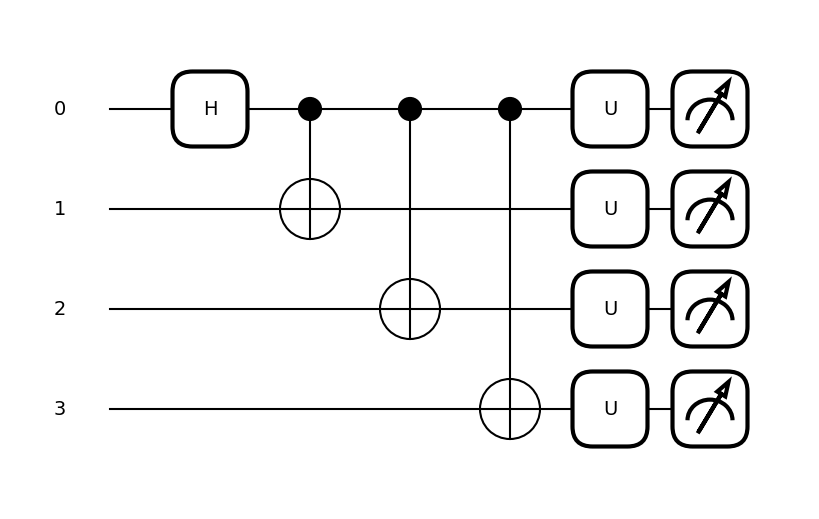

In [26]:
# Sample circuit
qml.draw_mpl(dataset_circuit)(4, 0.5)